<a href="https://colab.research.google.com/github/SivakumarReddy143/ML-project/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf


In [ ]:
df=pd.read_csv('/content/ipl_data.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [ ]:
df.drop(columns=['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'],inplace=True)

In [ ]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [ ]:
X=df.drop(columns='total')
y=df['total']

In [ ]:
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
venue_encode=LabelEncoder()
bat_team_encode=LabelEncoder()
bowl_team_encode=LabelEncoder()
batsman_encode=LabelEncoder()
bowler_encode=LabelEncoder()

In [ ]:
X['venue']=venue_encode.fit_transform(X['venue'])
X['bat_team']=bat_team_encode.fit_transform(X['bat_team'])
X['bowl_team']=bowl_team_encode.fit_transform(X['bowl_team'])
X['batsman']=batsman_encode.fit_transform(X['batsman'])
X['bowler']=bowler_encode.fit_transform(X['bowler'])

In [ ]:
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,14,6,12,328,201
1,14,6,12,61,201
2,14,6,12,61,201
3,14,6,12,61,201
4,14,6,12,61,201


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
x_train.head()

,venue,bat_team,bowl_team,batsman,bowler
31043,15,12,0,78,121
1720,22,2,4,393,48
62369,14,12,13,384,175
74763,21,4,6,398,157
10506,2,7,2,266,218


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled.shape[1]

5

In [ ]:
model=keras.Sequential([
    keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(216,activation='relu'),
    keras.layers.Dense(1,activation='linear')
])
huber_loss=tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam',loss=huber_loss)

In [ ]:
model.fit(x_train_scaled,y_train,epochs=50,batch_size=64,validation_data=(x_test_scaled,y_test))

Epoch 1/50
832/832 [==============================] - 5s 4ms/step - loss: 32.1258 - val_loss: 22.0583
Epoch 2/50
832/832 [==============================] - 3s 4ms/step - loss: 22.3584 - val_loss: 22.1343
Epoch 3/50
832/832 [==============================] - 3s 4ms/step - loss: 22.3264 - val_loss: 21.9417
Epoch 4/50
832/832 [==============================] - 3s 4ms/step - loss: 22.2392 - val_loss: 21.9474
Epoch 5/50
832/832 [==============================] - 4s 4ms/step - loss: 22.2256 - val_loss: 22.5144
Epoch 6/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1711 - val_loss: 21.8314
Epoch 7/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1591 - val_loss: 21.8465
Epoch 8/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1293 - val_loss: 21.8622
Epoch 9/50
832/832 [==============================] - 4s 4ms/step - loss: 22.0964 - val_loss: 21.7677
Epoch 10/50
832/832 [==============================] - 3s 4ms/step - loss: 22.0845

<Axes: >

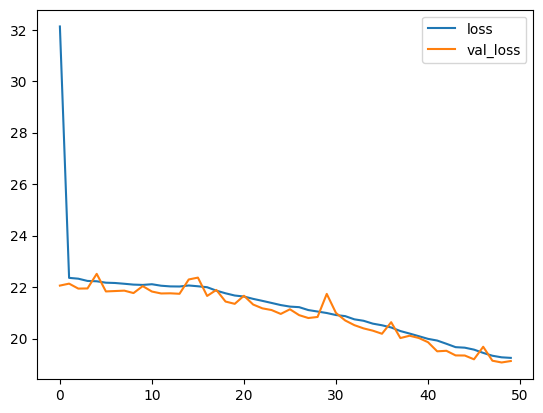

In [ ]:
model_losses=pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
predictions=model.predict(x_test_scaled)
predictions

713/713 [==============================] - 1s 2ms/step


array([[145.4615 ],
       [169.09508],
       [165.93645],
       ...,
       [151.98016],
       [135.62546],
       [168.25826]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(y_test,predictions)

19.619266360968098

In [ ]:
mean_squared_error(y_test,predictions)

724.0154830617769